**Instructors**: Prof. Keith Chugg (chugg@usc.edu) & Prof. Antonio Ortega (aortega@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Book**: Watt, J., Borhani, R., & Katsaggelos, A. K. (2020). Machine learning refined: Foundations, algorithms, and applications. Cambridge University Press.

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu) and Prof. Keith Chugg (chugg@usc.edu). These notebooks are based on the following **Github repository**: [notebooks](https://github.com/jermwatt/machine_learning_refined/tree/gh-pages/presentations/2nd_edition/jupyter%20%2B%20reveal.js%20version)

# Linear Regression

In [2]:
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
readDataPath = './readData/'

In [3]:
def plot_contours(g, weight_history, title, data, labels, inputs_flag = False):
    weights_steps_x = np.array([i[0] for i in weight_history])
    weights_steps_y = np.array([i[1] for i in weight_history])
    x = y = np.arange(-4.5, 4.5, 0.05)
    X, Y = np.meshgrid(x, y)
    if (inputs_flag):
        zs = np.array([g(np.array([x,y]), data, labels) for x,y in zip(np.ravel(X), np.ravel(Y))])
    else:
        zs = np.array([g(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    fig = plt.figure(figsize=(5,5))
    cp = plt.contourf(X, Y, Z, cmap='coolwarm')
    plt.colorbar(cp)
    plt.xlabel(r'$w_1$', fontsize=12)
    plt.ylabel(r'$w_2$', fontsize=12)
    #plt.axhline(y=0, color='r', linestyle='--')
    #plt.axvline(x=0, color='r', linestyle='--')
    plt.plot(weights_steps_x, weights_steps_y, 'sk', markersize=4)
    plt.quiver(weights_steps_x[:-1], weights_steps_y[:-1], weights_steps_x[1:]-weights_steps_x[:-1], weights_steps_y[1:]-weights_steps_y[:-1], scale_units='xy', angles='xy', scale=1)
    plt.plot(weights_steps_x[-1], weights_steps_y[-1], 'sy')
    plt.title(title,fontsize=16)
    plt.show()

In [4]:
## This code cell will not be shown in the HTML version of this notebook
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w, data, labels, inputs_flag = False ):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        if (inputs_flag == True):
            cost_eval,grad_eval = gradient(w,data,labels)
        else:
            cost_eval,grad_eval = gradient(w)
            
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    if (inputs_flag == True):
        cost_history.append(g(w,data,labels))
    else:
        cost_history.append(g(w))  
    return weight_history,cost_history

- Data for regression problems comes in the form of a set of
$P$ input/output observation pairs

\begin{equation}
 \left(\mathbf{x}_{1},y_{1}\right),\,\left(\mathbf{x}_{2},y_{2}\right),\,...,\,\left(\mathbf{x}_{P},y_{P}\right)
\end{equation}


- More compactly this is $\left\{ \left(\mathbf{x}_{p},y_{p}\right)\right\} _{p=1}^{P}$ , where $\mathbf{x}_{p}$ and $y_{p}$ denote the $p^{\textrm{th}}$ input and output respectively. 


- In simple instances the input is scalar-valued (the output will always be considered scalar-valued here), and hence the linear regression problem is geometrically speaking one of fitting a line to the associated scatter of data points in 2-dimensional space.  

- In general however each input $\mathbf{x}_{p}$ may be a column vector of length $N$


$$
\mathbf{x}_{p}=\begin{bmatrix}
x_{1,p}\\
x_{2,p}\\
\vdots\\
x_{N,p}
\end{bmatrix} 
$$

- With scalar input we must determine appropriate vertical intercept $w_0$ and slope $w_1$ so that the following holds

\begin{equation}
w_{0}+x_{p}w_{1}\approx y_{p},\quad p=1,...,P.
\end{equation}


- Notice that we have used the approximately equal sign because we cannot be sure that all data lies completely on a single line.  


- More generally, when dealing with $N$ dimensional input we have a bias and $N$ associated slope weights to tune properly 

\begin{equation}
w_{0}+ x_{1,p}w_{1} + x_{2,p}w_{2} + \cdots + x_{N,p}w_{N} \approx y_{p} ,\quad p=1,...,P.
\end{equation}

- Note: each dimension of the *input* is referred to in the jargon of machine learning as a *feature* or *input feature*.


- So we will often refer to $w_{1,p},\,w_{2,p},\,...,w_{N,p}$ as the *feature-touching weights* (the only weight *not* touching a feature is the bias $w_0$).

- For any $N$ we can write the above more compactly - in particular using the notation $\mathring{\mathbf{x}}_{\,}$ to denote an input $\mathbf{x}_{\,}$ with a $1$ placed on top of it as


$$
\mathbf{w}=\begin{bmatrix}
w_{0}\\
w_{1}\\
w_{2}\\
\vdots\\
w_{N}
\end{bmatrix}
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
\mathring{\mathbf{x}}_{\,}=\begin{bmatrix}
1 \\
x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{bmatrix}.
$$

- In particular, this means that we stack a $1$ on top of each of our input points $\mathbf{x}_p$ as 

$$
\mathring{\mathbf{x}}_p=\begin{bmatrix}
1 \\
x_{1,p}\\
x_{2,p}\\
\vdots\\
x_{N,p}
\end{bmatrix},\,\,\,\, p = 1,...,P
$$

- We may then write our desired linear relationships in equation (4) more compactly as

\begin{equation}
\mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} \approx \overset{\,}{y}_{p}^{\,} \quad p=1,...,P.
\end{equation}

## The Least Squares cost function

- To find the parameters of the hyperplane which best fits a regression dataset, it is common practice to first form the *Least Squares cost function*. 


- For a given set of parameters $\mathbf{w}$ this cost function computes the total squared error between the associated hyperplane and the data.


- Naturally then the best fitting hyperplane is the one whose parameters minimize this error.

- Where does this "Least Squares" cost come from?


- Remember, we want to find a weight vector $\mathbf{w}$ so that each of $P$ approximate equalities below holds as tightly as possible

\begin{equation}
\mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} \approx y_{p}
\end{equation}


- Another way of stating the above is to say that the *error* between $\mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} $ and $y_{p}$ is small.  

- One natural way to measure error between two quantities like this measure its *square* (so that both negative and positive errors are treating equally) as

\begin{equation}
g_p\left(\mathbf{w}\right) = \left(\mathring{\mathbf{x}}_{p}^{T}\mathbf{w} - \overset{\,}{y}_p^{\,}\right)^2.
\end{equation}


- This squared error $g_p\left(\cdot\right)$ is one example of a *point-wise cost* that measures the error of a model (here a linear one) on the point $\left\{\mathbf{x}_p,y_p\right\}$.

- Since we want all $P$ such values to be small we can take their average - forming a *Least Squares* cost function for linear regression

\begin{equation}
\,g\left(\mathbf{w}\right)=\frac{1}{P}\sum_{p=1}^{P} g_p\left(\mathbf{w}\right) = \frac{1}{P}\sum_{p=1}^{P}\left(\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,} - \overset{\,}{y}_p^{\,}\right)^{2}
\end{equation}


- Note that the Least Squares cost function is not just a function of the weights $\mathbf{w}$, but of the data as well.


- However when we express the function in mathematical shorthand as $g\left(\mathbf{w}\right)$ (as we do on the lefthand side above) we only show dependency on the weights $\mathbf{w}$. 

- Why do we do this?  Largely for notational simplicity: if we show dependency in our functional shorthand and write $g\left(\mathbf{w} ; \left\{\mathring{\mathbf{x}}_{p},\,y_p\right\}_{p=1}^{P} \right)$ things start to get too messy.  


- Moreover, for a given dataset the weights $\mathbf{w}$ are the important input - since this is what we need to tune in order to produce a good fit.  

- Because of this we will often refer to the Least Squares cost using the notation $g\left(\mathbf{w}\right)$, but the reader can keep in mind this subtle point that it is indeed a function of the data as well.  


- We will make this sort of notational simplification for virtually all future machine learning cost functions we study as well.

- Indeed we want to tune our parmeters $\mathbf{w}$ to *minimize* the Least Squares cost since the larger this value becomes the larger the squared error between the corresponding linear model and the data, and hence the poorer we represent the given dataset using a linear model.


- In other words, we want to determine a value for weights $\mathbf{w}$ that *minimizes* $g\left(\mathbf{w}\right)$, or written formally


$$\underset{\mathbf{w}}{\text{argmin}}\,\,\frac{1}{P}\underset{p=1}{\overset{P}{\sum}}\left(\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,}-\overset{\,}{y}_p^{\,}\right)^{2}$$

### The Least Squares cost function Implementation

- When implementing a cost function like Least squares it is helpful to think modularly, with the aim lightening the amount of mental 'bookkeeping' required, breaking down the cost into a few distinct pieces.  


- Here we can really break things down into two chunks: we have our *model* - a linear combination of input - and the cost (squared error) itself. 

- We can express our linear model - a function of our input and weights - is a function worthy enough of its own notation.  


- We will write it as 

\begin{equation}
\text{model}\left(\mathbf{x}_{p},\mathbf{w}\right) = \mathring{\mathbf{x}}_{p}^T \mathbf{w}.
\end{equation}

- If we were to go back then and use this modeling notation we could equally well e.g., our ideal settings of the weights our original approximation as

\begin{equation}
\text{model}\left(\mathbf{x}_{p},\mathbf{w}\right)   \approx y_p
\end{equation}


- and likewise our Least Squares cost function itself as

\begin{equation}
\,g\left(\mathbf{w}\right)=\frac{1}{P}\sum_{p=1}^{P}\left(\text{model}\left(\mathbf{x}_{p},\mathbf{w}\right)  -y_{p}^{\,}\right)^{2}.
\end{equation}

In [5]:
# compute linear combination of input point
def model(x_p,w):
    # compute linear combination and return
    a = w[0] + np.dot(x_p.T,w[1:])
    return a.T

In [6]:
# a least squares function for linear regression
def least_squares(w,x,y):    
    cost = np.sum((model(x,w)-y)**2)
    return cost/float(y.size)

In [8]:
data = np.loadtxt(readDataPath + '2d_linregress_data.csv',delimiter = ',')
x = data[:-1,:] # up to last row (exclusive) of data & all columns
y = data[-1:,:] # last row of data & all columns
assert x.shape == y.shape, f'Shape mismatch between X and Y'

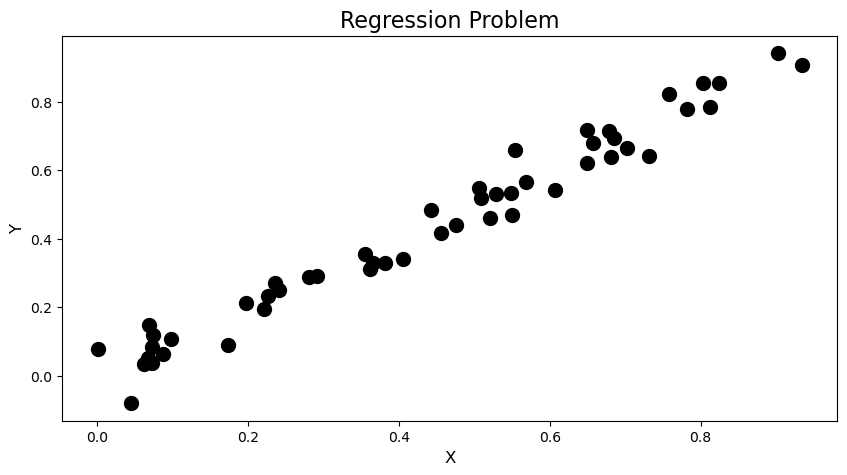

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(x,y,s=100,facecolors='k', edgecolors='k')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Regression Problem', fontsize=16)
plt.show()

In [10]:
g = least_squares; w = np.array([-1.0,-2.0])[:,np.newaxis]; max_its = 1000; alpha_choice = 0.5; #max_its = 75
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w, data = x, labels = y, inputs_flag=True)

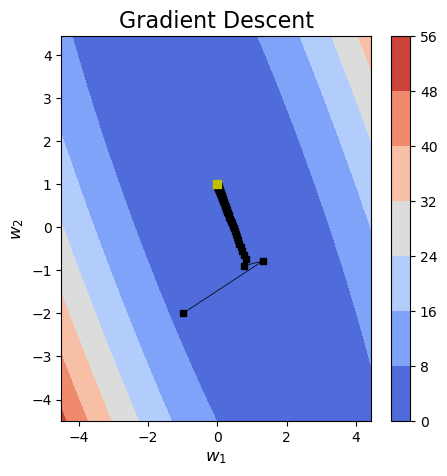

In [11]:
plot_contours(g, weight_history, title = 'Gradient Descent', data = x, labels = y, inputs_flag=True)

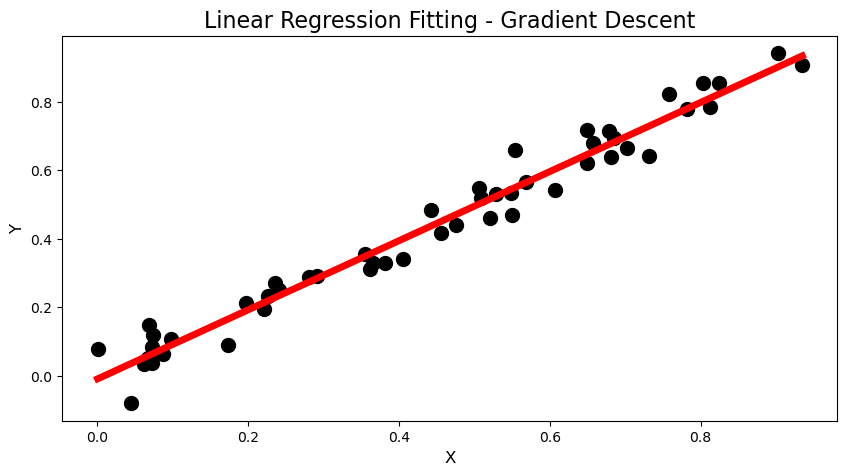

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(x,y,s=100,facecolors='k', edgecolors='k')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Linear Regression Fitting - Gradient Descent', fontsize=16)
x_line = np.linspace(min(x[0]),max(x[0]),1000).reshape((1,1000))
y_line = model(x_line,weight_history[-1])
plt.plot(x_line[0],y_line[0],'r-',linewidth=5)
plt.show()

In [13]:
g = least_squares; w = np.array([-1.0,-2.0])[:,np.newaxis]; max_its = 75; alpha_choice = 0.5;
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w, data = x, labels = y, inputs_flag=True)

# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares; w = np.array([-1.0,-2.0])[:,np.newaxis]; max_its = 75; alpha_choice = 10**(-2);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w, data = x, labels = y, inputs_flag=True)

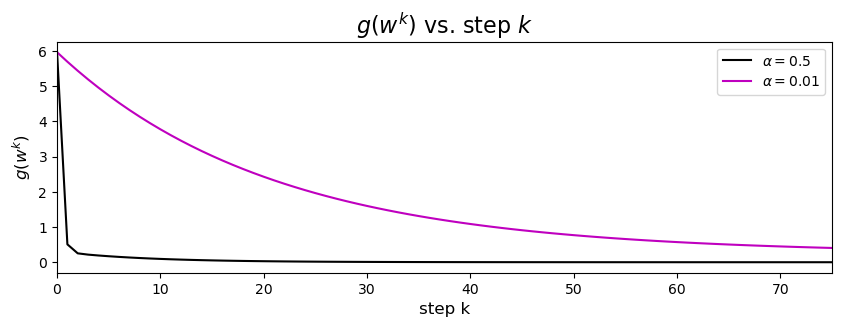

In [14]:
plt.figure(figsize=(10,3))
plt.plot(range(0,max_its+1), cost_history_1, 'k-', label = r'$\alpha=0.5$')
plt.plot(range(0,max_its+1), cost_history_2, 'm-',  label = r'$\alpha=0.01$')
plt.title(r'$g(w^k)$ vs. step $k$', fontsize=16)
plt.xlabel('step k', fontsize=12)
plt.ylabel(r'$g(w^k)$', fontsize=12)
plt.xlim(left=0, right=75)
plt.legend()
plt.show()

## Regression Quality Metrics

- Once we have successfully minimized the a cost function for linear regression it is an easy matter to determine the quality of our regression model.


- We must simply evaluate a cost function using our optimal weights. 


- We can then evalaute the quality of this trained model using a Least Squares cost.


- This is especially natural to use when we employ this cost in training. 

- To do this we plug in our trained model and dataset into the Least Squares cost - giving the *Mean Squared Error* (or *MSE* for short) of our trained model

\begin{equation}
\text{MSE}=\frac{1}{P}\sum_{p=1}^{P}\left(\text{model}\left(\mathbf{x}_p,\mathbf{w}^{\star}\right) -y_{p}^{\,}\right)^{2}.
\end{equation}

In [15]:
weight_history[-1]

array([[-0.00958875],
       [ 1.00985472]])

In [16]:
MSE = least_squares(weight_history[-1],x,y)
print("MSE: ", MSE)

MSE:  0.0022531179703818957


## sklearn Implementation

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
x_new = x.reshape((50,1))
y_new = y.reshape((50,1))

In [20]:
reg = model.fit(x_new, y_new)

In [21]:
print("Coefficients: ", reg.coef_)

Coefficients:  [[1.00985472]]


In [22]:
print("Intercept Coefficient: ", reg.intercept_)

Intercept Coefficient:  [-0.00958875]


In [23]:
predictions = reg.predict(x_new)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(y_new, predictions)
print('mse using sklearn: ', mse)

mse using sklearn:  0.002253117970381896
